In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

In [2]:
sns.set_style('darkgrid')

In [13]:
import os
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()

# Assuming your CSV files are in a folder named 'csv_data' within the current directory
folder_path = os.path.join(current_directory, 'Data')

dataframes = {}

# Loop through the files in the directory and read only .csv files
for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        dataframe_name = os.path.splitext(filename)[0]  # Remove the .csv extension
        dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
        dataframes[dataframe_name] = dataframe

# Now, dataframes will contain all your .csv files as DataFrames with their respective names.
dataframes.keys()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_26088\479943422.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_26088\479943422.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_26088\479943422.py:16: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dataframe = pd.read_csv(os.path.join(folder_path, filename), error_bad_lines=False)
C:\Users\Mukul\AppData\Local\Temp\ipykernel_26088\479943422.py:16: FutureWarning: The error_bad_lines argument has been depr

dict_keys(['dailyActivity_merged', 'dailyCalories_merged', 'dailyIntensities_merged', 'dailySteps_merged', 'heartrate_seconds_merged', 'hourlyCalories_merged', 'hourlyIntensities_merged', 'hourlySteps_merged', 'minuteCaloriesNarrow_merged', 'minuteCaloriesWide_merged', 'minuteIntensitiesNarrow_merged', 'minuteIntensitiesWide_merged', 'minuteMETsNarrow_merged', 'minuteSleep_merged', 'minuteStepsNarrow_merged', 'minuteStepsWide_merged', 'sleepDay_merged', 'weightLogInfo_merged'])

In [26]:
#Importing dataset (Sleep Data)
df=pd.read_csv('Heartrate Data.csv')
df.head()

,Id,Date,Time,Value
0,2022484408,12-04-2016,07:21:00,97
1,2022484408,12-04-2016,07:21:05,102
2,2022484408,12-04-2016,07:21:10,105
3,2022484408,12-04-2016,07:21:20,103
4,2022484408,12-04-2016,07:21:25,101


In [28]:
#Converting the date information into a datetime format, enhancing our ability to extract finer-grained insights from the data.
df = dataframes['heartrate_seconds_merged']
df['Time'] = pd.to_datetime(df['Time'],format="%m/%d/%Y %I:%M:%S %p")
df["Hour"] = df["Time"].dt.hour
df["Date"] = df["Time"].dt.date
df["Weekday"] = df["Time"].dt.day_name()

# Variation in Average Daily Heart Rate Over Dates & Days of the Week

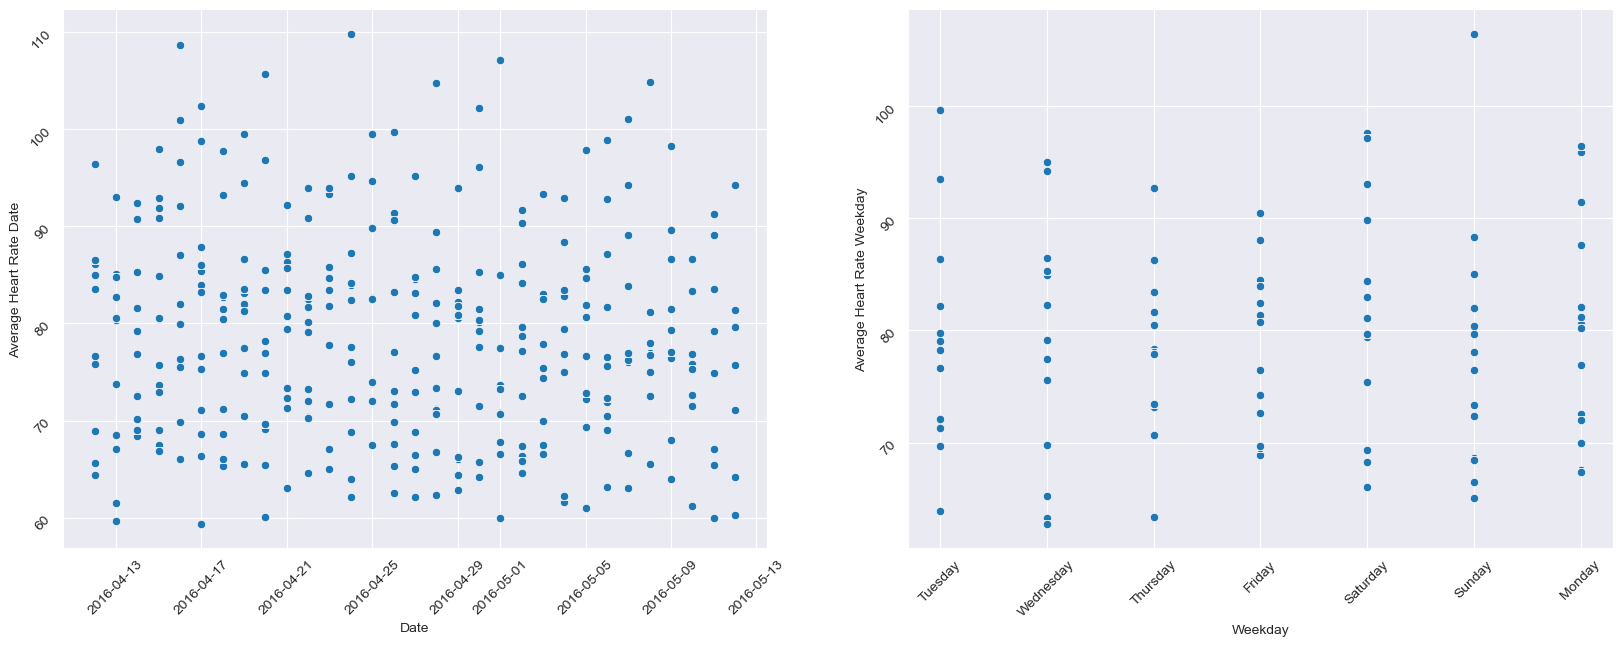

In [29]:
'''
The graph on the left side depicts the variation in the average daily heart rate over different dates,
showing how heart rate changes over time. The graph on the right side illustrates how the average daily
heart rate varies across different days of the week, providing insights into any patterns or trends related
to heart rate on specific days.
'''
#Calculation for average daily heart rate by date and visualising how it varies with days of week
df["Average Heart Rate Date"] = df.groupby(
    ["Id", "Date"])["Value"].transform("mean")
df["Average Heart Rate Weekday"] = df.groupby(
    ["Id", "Weekday"])["Value"].transform("mean")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
sns.scatterplot(data=df,
                x="Date",
                y="Average Heart Rate Date",
                ax=ax1)
ax1.tick_params(labelrotation=45);

sns.scatterplot(data=df,
                x="Weekday",
                y="Average Heart Rate Weekday",
                ax=ax2)
ax2.tick_params(labelrotation=45);

Since the dataset lacks information on participants' gender or age, our primary method of identifying potential health risks is through their heart rates. Abnormally low or high heart rates can serve as indicators of underlying health issues.

**For most adults, a heart rate ranging from 60 to 100 beats per minute (bpm) is considered normal. Various factors such as stress, anxiety, hormonal changes, medication, and physical activity level can influence heart rate. Athletes or individuals who are more physically active might have resting heart rates as low as 40 bpm (source).**

To start, we'll focus on identifying users with exceptionally low heart rates.

# Average Heart Rate by Date for Instances with Heart Rates Below 50 BPM

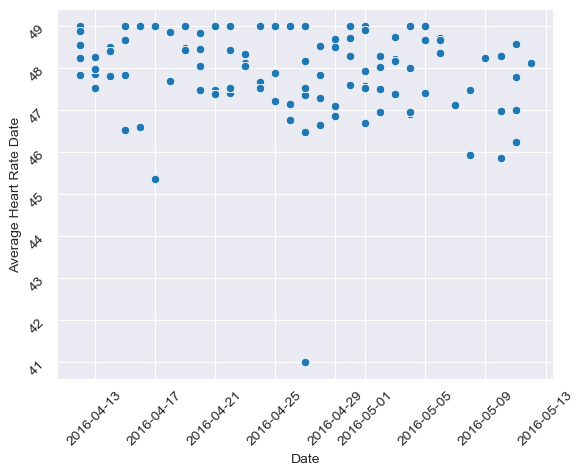

In [30]:
'''
The graph illustrates the average heart rate by date for instances where heart rates fell below 50 beats per minute,
highlighting specific dates with extremely low heart rate values. This visualization helps identify and understand
the patterns or anomalies associated with unusually low heart rate measurements on particular days.
'''
#Identifying extremely low heart rate
low_heart_rate = df[df["Value"] < 50].copy()

low_heart_rate["Average Heart Rate Date"] = low_heart_rate.groupby(
    ["Id", "Date"])["Value"].transform("mean")

fig, ax = plt.subplots()
fig = sns.scatterplot(data=low_heart_rate,
                      x="Date",
                      y="Average Heart Rate Date")

x_dates = low_heart_rate['Date'].sort_values().unique()
ax.tick_params(labelrotation=45);

Examining the plot, we can clearly identify a specific user with an exceptionally low average heart rate. To investigate further, we'll create a more detailed visualization by plotting this user's heart rates that fall below 45 bpm.

In [31]:
#Getting descriptive values
df.iloc[df['Value'].idxmin()]

Id                                     5577150313
Time                          2016-05-04 02:00:10
Value                                          36
Hour                                            2
Date                                   2016-05-04
Weekday                                 Wednesday
Average Heart Rate Date                 62.245882
Average Heart Rate Weekday              65.190538
Name: 1504247, dtype: object

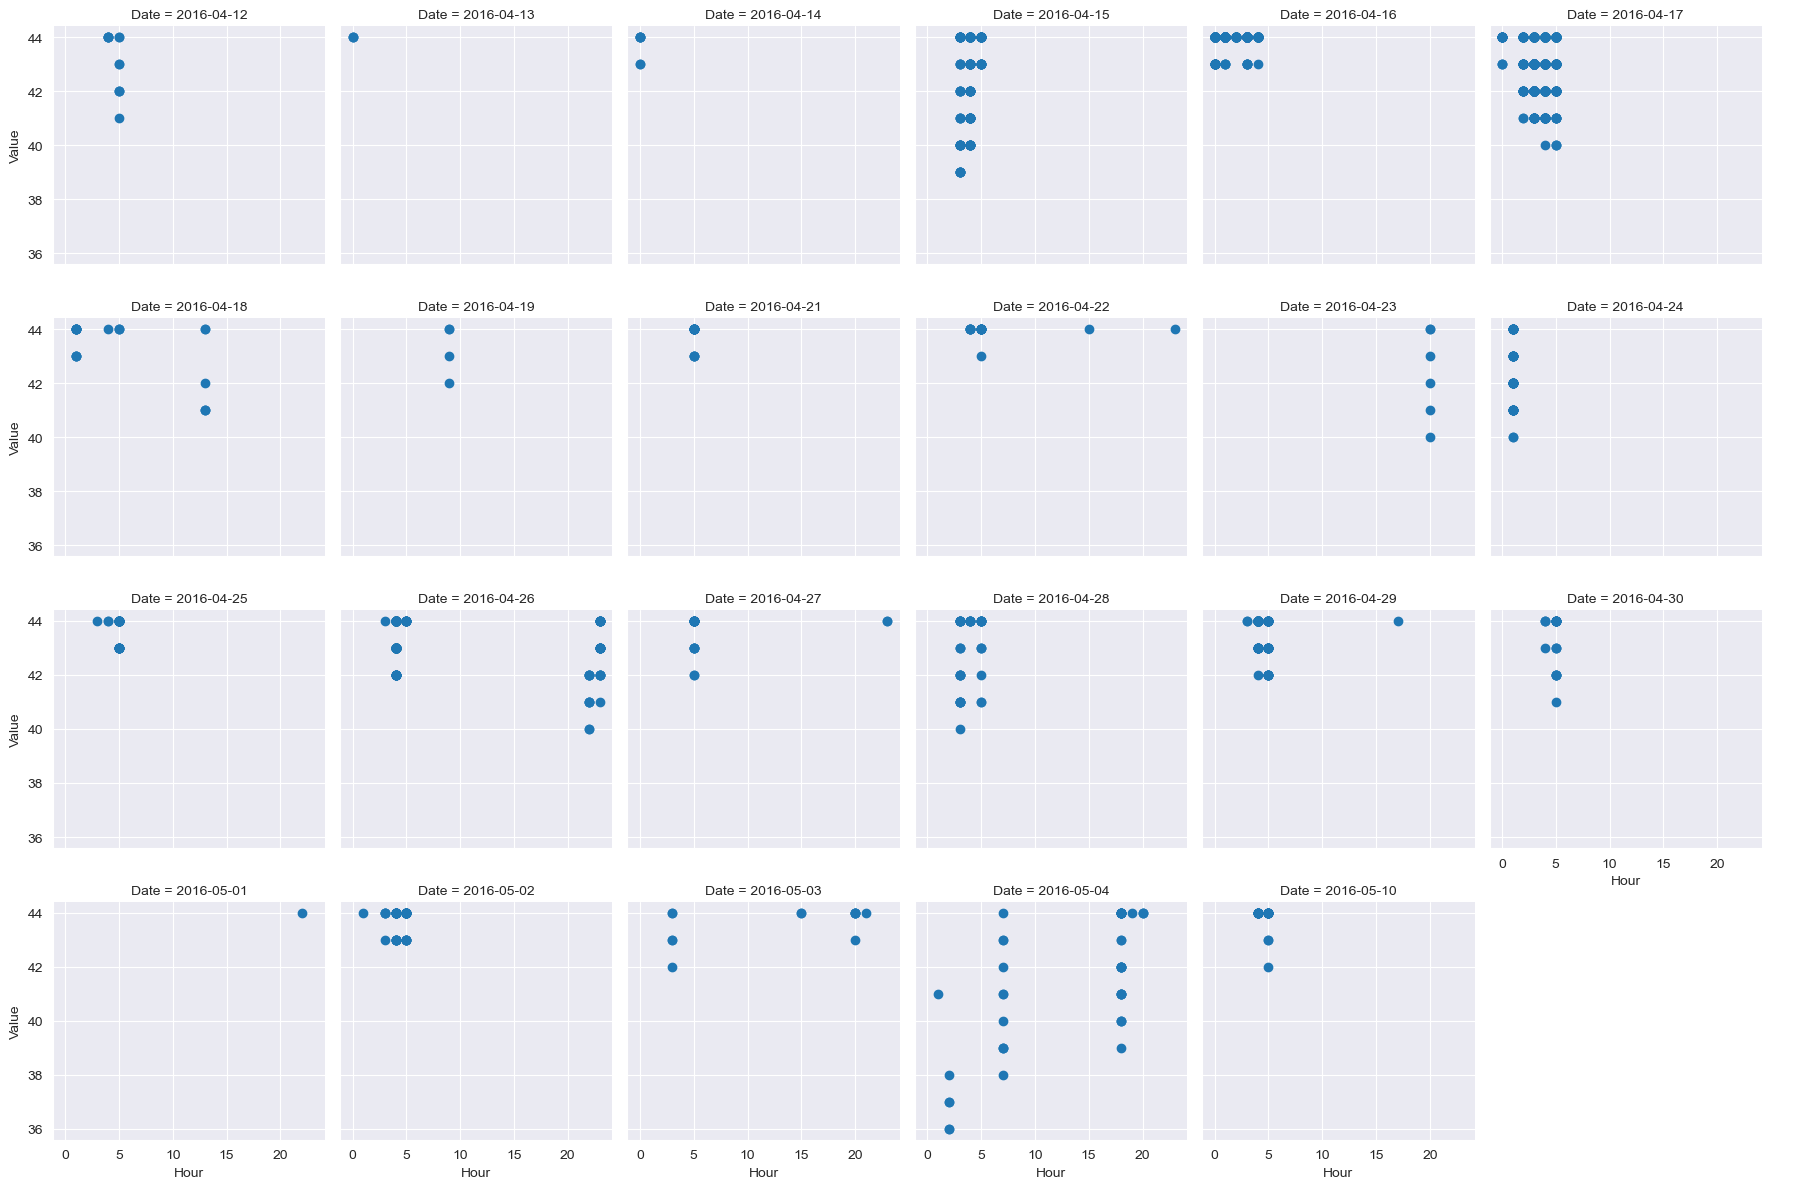

In [33]:
'''
The provided code creates a series of scatterplots based on specific conditions. It selects data points where the
heart rate ("Value") is less than 45 beats per minute and the user ID is 5577150313. It then plots these data
points in a grid format, with each column representing a different date and up to six columns per row, allowing
for comparisons of heart rate values at different hours for the specified user and dates. The legend provides
additional context, and the scatterplots show the relationship between the hour of the day and heart rate values
for the selected user on different dates.
'''
#Plotting graphs based on specified condition stated below
low_heart_rate_user = df[(df["Value"] < 45)
                                    & (df["Id"] == 5577150313)]

graph = sns.FacetGrid(low_heart_rate_user, col="Date", col_wrap=6).add_legend()
graph.map(plt.scatter, "Hour", "Value")
plt.show()

In certain instances, an individual being an athlete may account for the consistently lower heart rates observed throughout the day. However, due to the lack of information regarding gender, age, and overall health status, we cannot definitively assess the user's health risks based solely on this Fitbit data. Nonetheless, it's worth noting that this user exhibits irregular patterns in terms of both the frequency and duration of low heart rates over the course of the month.

# Exercise Amount vs Hours & Days

Analyzing which hour users are most active

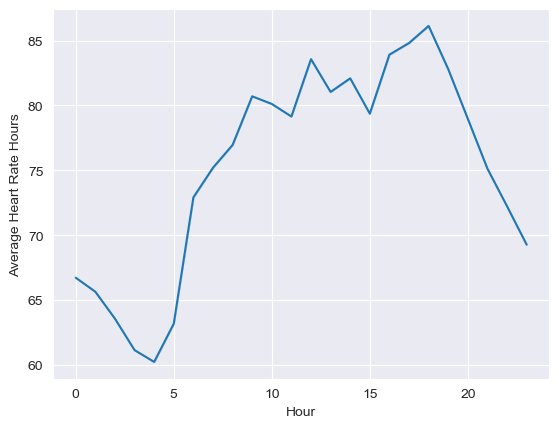

In [34]:
#Plotting linechart
df["Average Heart Rate Hours"] = df.groupby(
    'Hour').Value.transform("mean")
df = df.sort_values(by="Hour")
fig = sns.lineplot(data=df, x="Hour", y="Average Heart Rate Hours")
plt.show()

This graph illustrates that the **majority of exercise activities occur between 16:00 and 18:00 during the day, while users tend to be largely inactive during the evening hours from 23:00 to 05:00.**

To begin, we'll merge the hourly steps and calories dataframes and convert the data type of the "ActivityHour" column to datetime in order to facilitate calculations.

In [35]:
#Converting datatype as required and merging dataframes
hourly_steps = dataframes["hourlySteps_merged"]
hourly_calories = dataframes["hourlyCalories_merged"]

hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
hourly_calories['ActivityHour'] = pd.to_datetime(
    hourly_calories['ActivityHour'])

hourly_merged = pd.merge(hourly_steps,
                         hourly_calories,
                         on=['ActivityHour', 'Id'])

# Calories by Time of Day

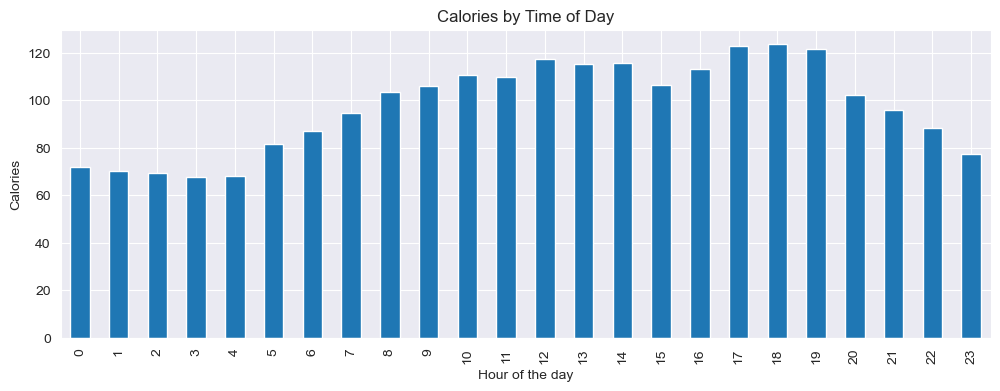

In [36]:
#Plotting histogram
plt.subplots(figsize=(12, 4))
hourly_merged_calories_mean = hourly_merged.groupby(
    hourly_merged['ActivityHour'].dt.hour)['Calories'].mean()
hourly_merged_calories_mean.plot(kind='bar')
plt.xlabel("Hour of the day")
plt.ylabel("Calories")
plt.title('Calories by Time of Day')
plt.show()

According to this graph, **users typically begin to increase their activity levels between 6 and 8 am. The peak hours for activity appear to be between 5 and 7 pm, possibly indicating that individuals opt for workouts after completing their work or school commitments. Beyond 8 pm, activity levels gradually decline, suggesting that people tend to retire for the night around that time.**

# Most Active Time of Day

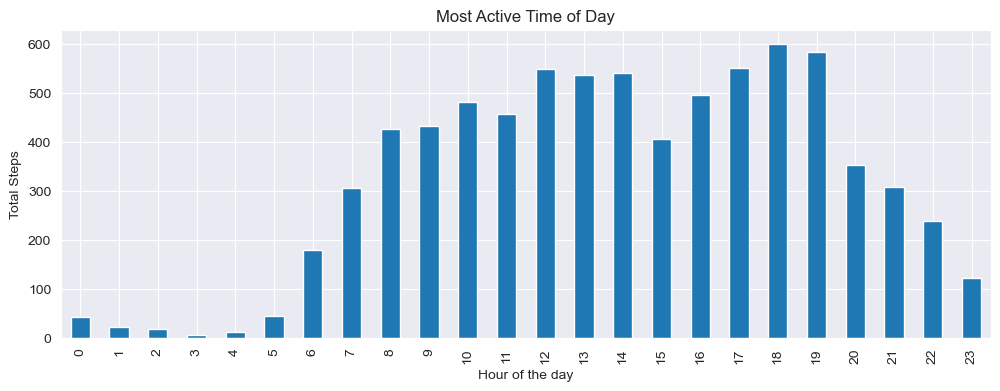

In [37]:
#Plotting histogram
fig, axs = plt.subplots(figsize=(12, 4))
hourly_merged_steps_mean = hourly_merged.groupby(
    hourly_merged['ActivityHour'].dt.hour)['StepTotal'].mean()
hourly_merged_steps_mean.plot(kind='bar')
plt.xlabel("Hour of the day")
plt.ylabel("Total Steps")
plt.title('Most Active Time of Day')
plt.show()

The graph above illustrates that **we typically burn approximately 50 calories per hour while sleeping**, a pattern evident in the graph. As users awaken and engage in physical activity, the calorie expenditure rises, reaching its zenith during the period when users are most active during the day.

Now, let's examine the days when users exhibit the highest levels of activity.

In [38]:
#Importing dataframe (Daily Activity)
df_daily=pd.read_csv('Daily Activity.csv')

In [39]:
#Converting datatype of 'ActivityDate' from 'object' to 'datetime'
df_daily['ActivityDate']=pd.to_datetime(df_daily['ActivityDate'])

In [40]:
'''
The provided code is preparing data for analysis by assigning a numerical representation to the days of the week
(1 for Monday, 2 for Tuesday, etc.) based on the "day_of_week" column derived from the "ActivityDate" in the DataFrame.
This numerical representation facilitates further analysis or visualization of daily fitness metrics, such as total
distance, calories burned, and activity minutes, by allowing them to be associated with specific days of the week.
'''
import datetime
import calendar

def findDay(date):
    d = date.weekday()
    return (calendar.day_name[d])


df_daily["day_of_week"] = df_daily["ActivityDate"].apply(findDay)

df_mean = df_daily.pivot_table(values=[
    "TotalDistance", "Calories", "VeryActiveMinutes", "FairlyActiveMinutes",
    "LightlyActiveMinutes", "SedentaryMinutes"
],
                         index="day_of_week",
                         aggfunc='mean')
df_mean.reset_index(inplace=True)
x_day_of_week = df_mean["day_of_week"]
x_day_of_week = x_day_of_week.replace("Monday", 1)
x_day_of_week = x_day_of_week.replace("Tuesday", 2)
x_day_of_week = x_day_of_week.replace("Wednesday", 3)
x_day_of_week = x_day_of_week.replace("Thursday", 4)
x_day_of_week = x_day_of_week.replace("Friday", 5)
x_day_of_week = x_day_of_week.replace("Saturday", 6)
x_day_of_week = x_day_of_week.replace("Sunday", 7)

In [41]:
df_daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,day_of_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,Tuesday
1,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,1432,Tuesday,Tuesday
2,1644430081,2016-04-12,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,3199,Tuesday,Tuesday
3,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,2030,Tuesday,Tuesday
4,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday,Tuesday


# Day of Week vs Total Distance and Calories 

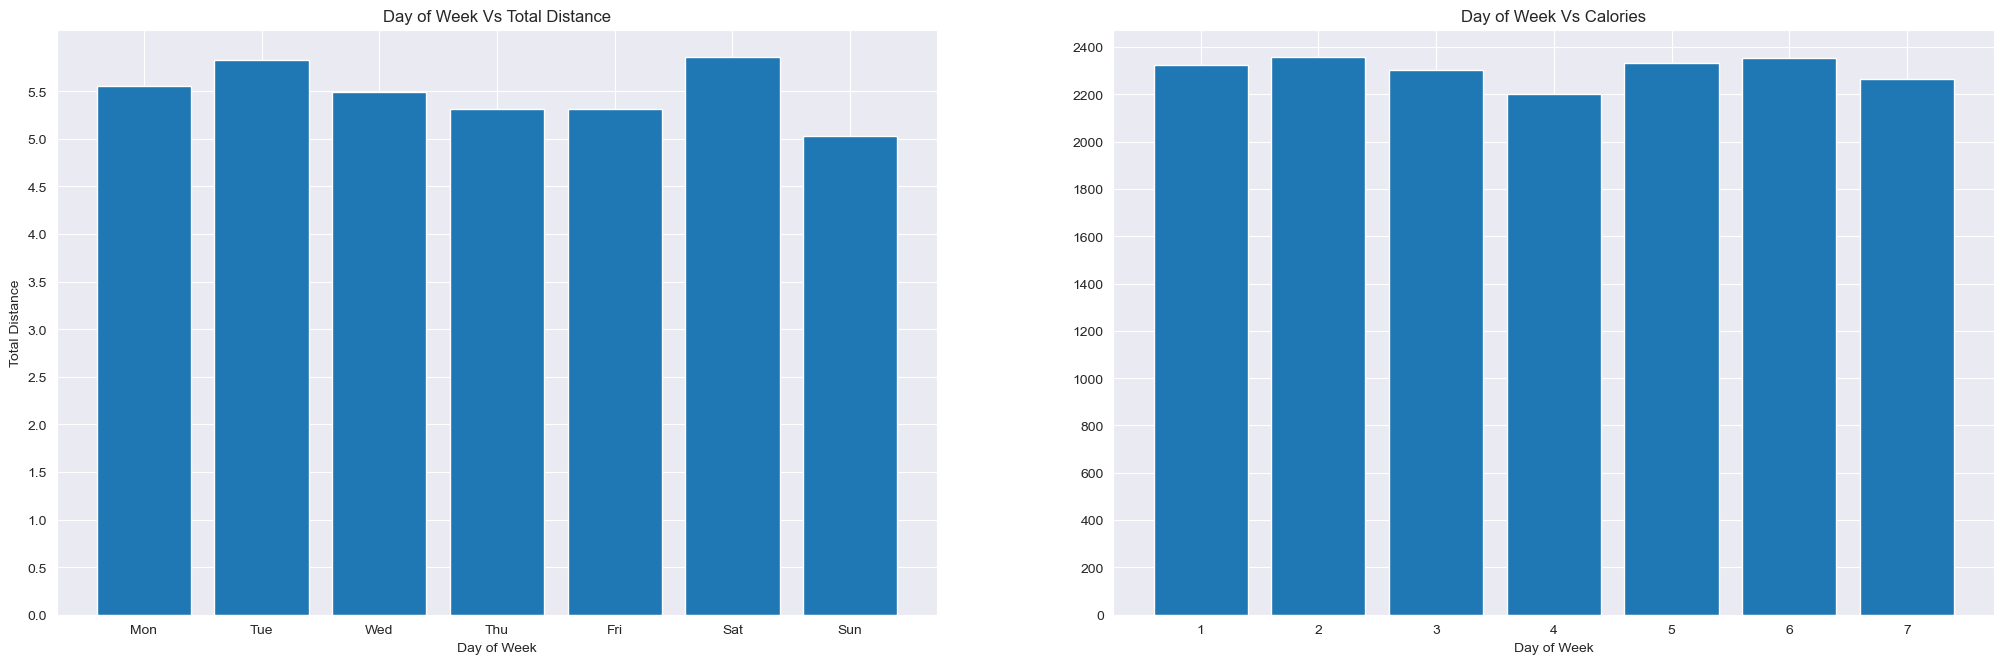

In [42]:
#Plotting histogram (Day of Week vs Total Distance)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 7.6))
ax1.bar(x_day_of_week, df_mean["TotalDistance"])
ax1.set_title("Day of Week Vs Total Distance")
ax1.set_xlabel("Day of Week")
ax1.set_ylabel("Total Distance")
ax1.set_xticks(x_day_of_week)
ax1.set_xticklabels(["Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed"])
ax1.set_yticks(np.arange(0, 6, 0.5));

#Plotting histogram (Day of Week vs Calories)
ax2.bar(x_day_of_week, df_mean["Calories"])
ax2.set_title("Day of Week Vs Calories")
ax2.set_xlabel("Day of Week")
ax1.set_xticks(x_day_of_week)
ax1.set_xticklabels(["Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed"])
ax2.set_yticks(np.arange(0, 2600, 200));

# Correlation Matrix

C:\Users\Mukul\AppData\Local\Temp\ipykernel_26088\2569709501.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_corr = df_daily.corr()


<Axes: >

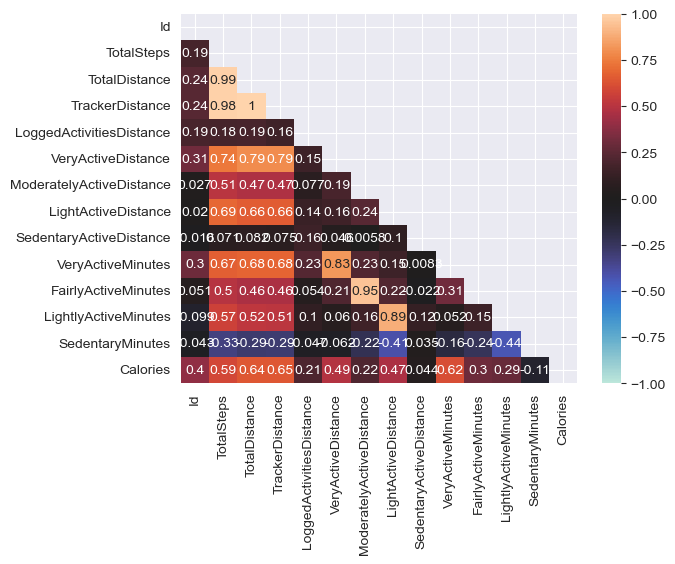

In [43]:
#Analysing correlation between features
feature_corr = df_daily.corr()
mask = np.zeros_like(feature_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(feature_corr, annot=True, mask=mask, vmin=-1, vmax=1, center=0)

Examining this graph reveals several noteworthy observations:

1. There doesn't appear to be a strong correlation between different activity levels. In other words, highly active users are not necessarily more or less likely to engage in moderate or light activities.

2. Sedentary active minutes exhibit the most significant negative correlation with light active minutes, suggesting that **individuals who engage in intense exercise are more inclined to rest more during the remainder of the day.**

3. As expected, the number of calories burned is highly correlated with total distance and total steps. However, interestingly, it appears that the **distance covered during light activity is more strongly correlated with calories burned than the distance covered during moderate activity.**

In [44]:
#Creating new column 'ActiveMinutes' having values by addition of respective columns as specified
df_daily['ActiveMinutes'] = df_daily[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].sum(axis=1)

In [45]:
#Viewing filtered dataset
df_daily.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,day_of_week,ActiveMinutes
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,Tuesday,366
1,1624580081,2016-04-12,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,1432,Tuesday,Tuesday,146
2,1644430081,2016-04-12,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,3199,Tuesday,Tuesday,309
3,1844505072,2016-04-12,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,2030,Tuesday,Tuesday,339
4,1927972279,2016-04-12,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday,Tuesday,55


In [58]:
#Filtering 'df_daily' dataset
#df_daily = df_daily.drop(columns=['Id','ActivityDate','day_of_week'])
#df_daily=df_daily.drop(columns=['TrackerDistance'])
#df_daily=df_daily.drop(columns=['LoggedActivitiesDistance'])
df_daily.head()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActiveMinutes
0,13162,8.50,1.88,0.55,6.06,0.0,25,13,328,728,1985,366
1,8163,5.31,0.00,0.00,5.31,0.0,0,0,146,1294,1432,146
2,10694,7.77,0.14,2.30,5.33,0.0,2,51,256,1131,3199,309
3,6697,4.43,0.00,0.00,4.43,0.0,0,0,339,1101,2030,339
4,678,0.47,0.00,0.00,0.47,0.0,0,0,55,734,2220,55


## Applying Linear Regression

In [59]:
#Splitting the dataset as train data and test data
from sklearn.model_selection import train_test_split
X = df_daily[df_daily.columns[~df_daily.columns.isin(['TotalSteps'])]]  #Input
y = df_daily["TotalSteps"]  #Output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Root Mean Squared Error is: 394.09539826158215


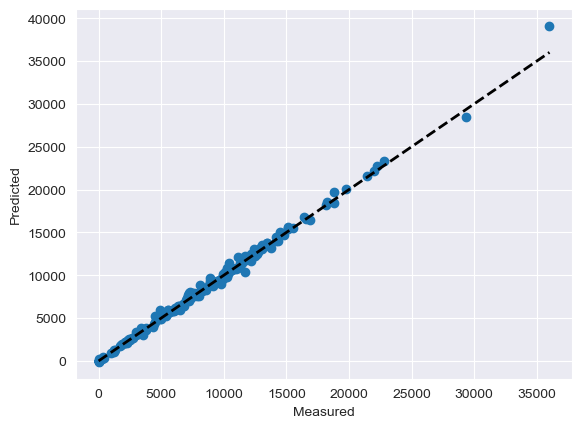

In [62]:
'''
The provided code performs polynomial linear regression on the dataset. It first generates polynomial features of
degree 2 using the PolynomialFeatures transformer.Then, it fits a linear regression model to the transformed data.
After training, the model is used to make predictions on the test data, and the root mean squared error (RMSE) is
calculated to assess the model's accuracy. Lastly, the code generates a scatterplot comparing the actual (measured)
values with the predicted values, helping visualize the model's performance in predicting the target variable.
'''
#Applying Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

#Getting Polynomials
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

#Fitting a Linear Regression Model to the data
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

#Prediction
y_pred = regressor.predict(poly.fit_transform(X_test))

print("Root Mean Squared Error is: " +
      str(mean_squared_error(y_test, y_pred, squared=False)))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'k--',
        lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Applying Ridge Regression Model

Root Mean Squared Error is: 402.3569144474943


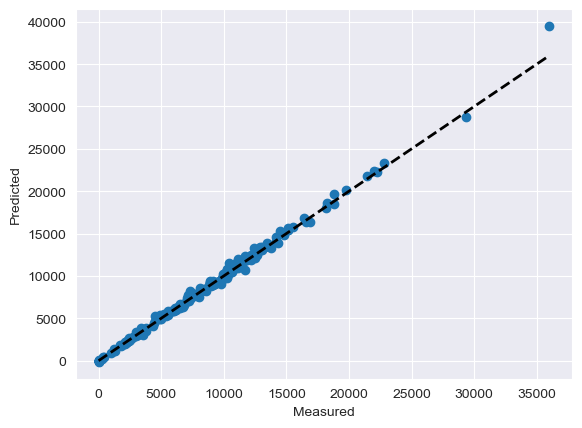

In [63]:
'''
The provided code applies a Ridge Regression model to the dataset. It sets up a data preprocessing pipeline that
includes polynomial feature transformation and standard scaling. It then performs a grid search with cross-validation
to find the best combination of hyperparameters for Ridge Regression, specifically the regularization parameter alpha.
After identifying the best model, it makes predictions on the test data, calculates the root mean squared error (RMSE)
to evaluate its accuracy, and generates a scatterplot comparing the actual (measured) values with the predicted values.
This process is similar to the previous code for Random Forest Regression and linear regression but specifically focuses
on Ridge Regression with hyperparameter tuning.
'''
#Applying Ridge Regression Model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

steps = [('poly', PolynomialFeatures(degree=2)), ('scalar', StandardScaler()),
         ('ridge', Ridge())]

ridge_params = {'ridge__alpha': np.linspace(0, 1, 100)}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#Fitting a Ridge regression Model to the data
ridge_pipe = Pipeline(steps)
grid_search = GridSearchCV(ridge_pipe, ridge_params, cv=cv)
best = grid_search.fit(X_train, y_train).best_estimator_

#Prediction
y_pred = best.predict(X_test)

print("Root Mean Squared Error is: " +
      str(mean_squared_error(y_test, y_pred, squared=False)))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'k--',
        lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Applying Random Forest Regression 

Root Mean Squared Error is: 1142.4551801430277


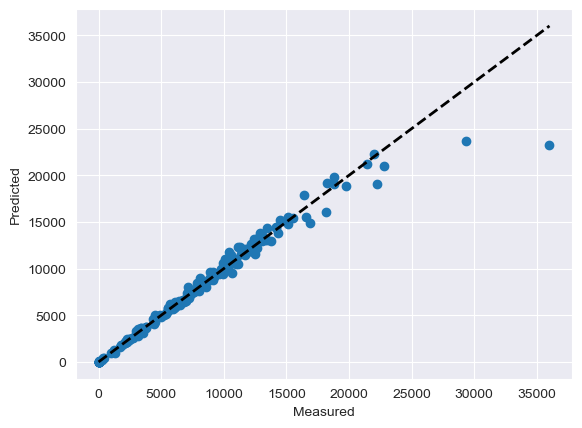

In [64]:
'''
The provided code applies a Random Forest Regression model to the dataset. It first sets up a data preprocessing
pipeline that includes polynomial feature transformation and standard scaling. Then, it fits a Random Forest
Regressor to the training data within this pipeline. After training, the model is used to make predictions
on the test data, and the root mean squared error (RMSE) is calculated to evaluate the model's accuracy.
Finally, the code generates a scatterplot that compares the actual (measured) values with the predicted
values, allowing for a visual assessment of the model's predictive performance, similar to the previous
code for linear regression.
'''
#Applying Randonm Forest Regression Model
from sklearn.ensemble import RandomForestRegressor

steps = [('poly', PolynomialFeatures(degree=2)), ('scalar', StandardScaler()),
         ('regressor', RandomForestRegressor())]

pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

#Prediction
y_pred = pipe.predict(X_test)

print("Root Mean Squared Error is: " +
      str(mean_squared_error(y_test, y_pred, squared=False)))

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'k--',
        lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()